In [1]:
import pandas as pd
import numpy as np

In [2]:
urls = dict(
    pers_auto = "https://www.casact.org/sites/default/files/2021-04/ppauto_pos.csv"
    , wc = "https://www.casact.org/sites/default/files/2021-04/wkcomp_pos.csv"
    , comm_auto = "https://www.casact.org/sites/default/files/2021-04/comauto_pos.csv"
    , med_mal = "https://www.casact.org/sites/default/files/2021-04/medmal_pos.csv"
    , products = "https://www.casact.org/sites/default/files/2021-04/prodliab_pos.csv"
    , other_liab = "https://www.casact.org/sites/default/files/2021-04/othliab_pos.csv"
)

In [89]:
%run data.py

In [90]:
naic = NAICtriangles()
naic.build_naic()

Building cumulative dataframes...
Building incremental dataframes...
Building loss ratio dataframes...


In [92]:
df = naic.naic_df.copy()

In [95]:
col_diffs = []
for i, c in enumerate(df.columns):
    if i == 0:
        pass
    else:
        col_diffs.append(df.iloc[:, i] - df.iloc[:, i-1])

col_diffs = pd.concat(col_diffs, axis=1)
col_diffs

0  \
triangle_id group_code lob        type_of_loss  is_cum is_dollar                
0           43         pers_auto  paid_loss     1      1           200.000000   
                                                       1           812.000000   
                                                       1          2834.000000   
                                                       1          6990.000000   
                                                       1          8497.000000   
...                                                                       ...   
6231        44598      other_liab reported_loss 0      0            -0.239024   
                                                       0            -0.265909   
                                                       0             0.586902   
                                                       0             0.050584   
                                                       0                  NaN   

                                                                            1  \
triangle_id group_code lob        type_of_loss  is_cum is_dollar                
0           43         pers_auto  paid_loss     1      1            98.000000   
                                                       1           619.000000   
                                                       1          2016.000000   
                                                       1          3596.000000   
                                                       1          6404.000000   
...                                                                       ...   
6231        44598      other_liab reported_loss 0      0            -0.143902   
                                                       0             0.118182   
                                                       0             0.355164   
                                                       0                  NaN   
                                                       0                  NaN   

                                                                            2  \
triangle_id group_code lob        type_of_loss  is_cum is_dollar                
0           43         pers_auto  paid_loss     1      1           139.000000   
                                                       1           214.000000   
                                                       1          1207.000000   
                                                       1          1533.000000   
                                                       1          2739.000000   
...                                                                       ...   
6231        44598      other_liab reported_loss 0      0             0.000000   
                                                       0             0.134091   
                                                       0                  NaN   
                                                       0                  NaN   
                                                       0                  NaN   

                                                                            3  \
triangle_id group_code lob        type_of_loss  is_cum is_dollar                
0           43         pers_auto  paid_loss     1      1            45.000000   
                                                       1           184.000000   
                                                       1           508.000000   
                                                       1           665.000000   
                                                       1          1313.000000   
...                                                                       ...   
6231        44598      other_liab reported_loss 0      0             0.002439   
                                                       0                  NaN   
                                                       0                  NaN   
                       

In [99]:
print('mean')
%timeit mean_diff = col_diffs.mean(axis=1)

# print('median')
# %timeit median_diff = col_diffs.median(axis=1)

print('std')
%timeit sd_diff = col_diffs.std(axis=1)

print('max')
%timeit max_diff = col_diffs.max(axis=1)

print('min')
%timeit min_diff = col_diffs.min(axis=1)

print('skew')
%timeit skew_diff = col_diffs.skew(axis=1)

print('kurt')
%timeit kurt_diff = col_diffs.kurt(axis=1)

# print('quantile')
# %timeit q25_diff = col_diffs.quantile(0.25, axis=1)
# %timeit q75_diff = col_diffs.quantile(0.75, axis=1)

print('iqr')
%timeit iqr_diff = q75_diff - q25_diff

mean
11.1 ms ± 207 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
median


c:\Users\AndyW\anaconda3\envs\naic\lib\site-packages\numpy\core\_methods.py:48: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
c:\Users\AndyW\anaconda3\envs\naic\lib\site-packages\numpy\core\_methods.py:48: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
c:\Users\AndyW\anaconda3\envs\naic\lib\site-packages\numpy\core\_methods.py:48: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
c:\Users\AndyW\anaconda3\envs\naic\lib\site-packages\numpy\core\_methods.py:48: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
c:\Users\AndyW\anaconda3\envs\naic\lib\site-packages\numpy\core\_methods.py:48: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
c:\Users\AndyW\anaco

84.8 ms ± 11.5 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
std
31.8 ms ± 4.8 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
max
14 ms ± 2.02 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)
min
12.3 ms ± 879 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
skew
31.3 ms ± 816 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
kurt
32.5 ms ± 731 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
quantile


c:\Users\AndyW\anaconda3\envs\naic\lib\site-packages\numpy\lib\function_base.py:4527: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
c:\Users\AndyW\anaconda3\envs\naic\lib\site-packages\numpy\lib\function_base.py:4529: RuntimeWarning: invalid value encountered in add
  lerp_interpolation = asanyarray(add(a, diff_b_a * t, out=out))
c:\Users\AndyW\anaconda3\envs\naic\lib\site-packages\numpy\lib\function_base.py:4530: RuntimeWarning: invalid value encountered in subtract
  subtract(b, diff_b_a * (1 - t), out=lerp_interpolation, where=t >= 0.5)


5.6 s ± 461 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
iqr
419 µs ± 53.6 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


ValueError: X must have 2 or fewer dimensions

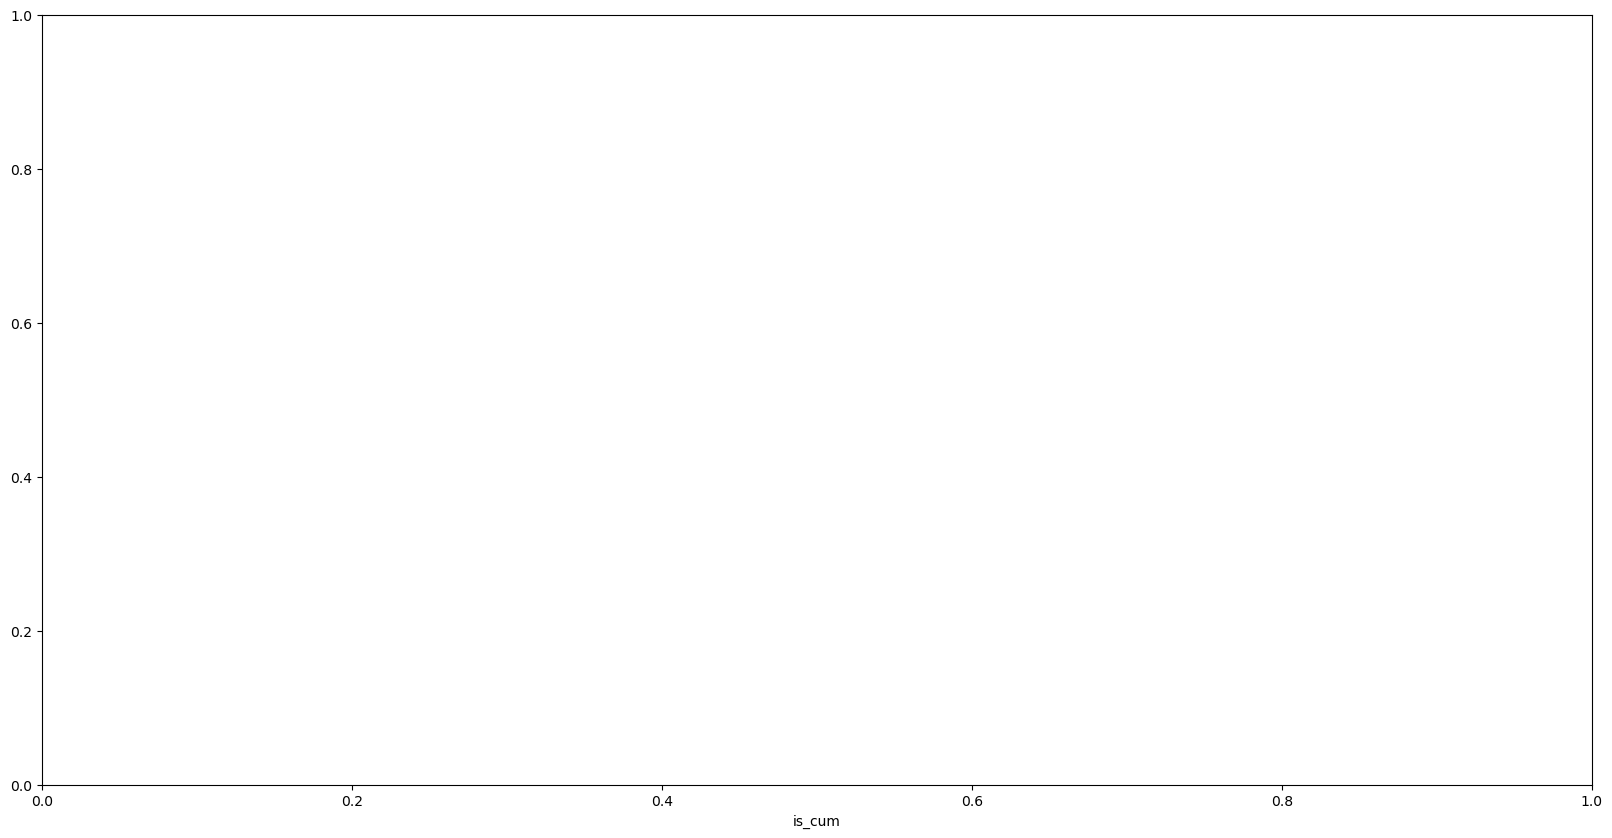

In [103]:
pct_chg = df.pct_change(axis=1).drop(columns=df.columns[0])
pct_chg.reset_index().boxplot(column=pct_chg.columns, by='is_cum', figsize=(20, 10))

In [83]:
naic.naic_df.reset_index()['is_cum group_code lob type_of_loss'.split()].drop_duplicates().reset_index(drop=True)

,is_cum,group_code,lob,type_of_loss
0,1,43,pers_auto,paid_loss
1,1,43,pers_auto,reported_loss
2,1,266,pers_auto,paid_loss
3,1,266,pers_auto,reported_loss
4,1,353,pers_auto,paid_loss
...,...,...,...,...
3111,0,44300,other_liab,reported_loss
3112,0,44377,other_liab,paid_loss
3113,0,44377,other_liab,reported_loss
3114,0,44598,other_liab,paid_loss


In [84]:
for c in self.naic_df.columns.tolist():
    self.

SyntaxError: invalid syntax (535535273.py, line 2)

In [ ]:
lobs = ['pers_auto', 'wc', 'comm_auto', 'med_mal', 'products', 'other_liab']
dflist = []
for lob in lobs:
    df, _ = read_naic_csv(lob=lob)
    df['lob'] = lob
    dflist.append(df)
cum_df = pd.concat(dflist)
cum_df = cum_df.loc[cum_df.type_of_loss.isin('reported_loss paid_loss'.split())].reset_index(drop=True)
cum_df['is_cum'] = 1
cum_df = cum_df.set_index('is_cum group_code lob type_of_loss ay ep'.split())
cum_df

1        2  \
is_cum group_code lob        type_of_loss  ay   ep                       
1      43         pers_auto  paid_loss     1988 895     133.0    333.0   
                                           1989 3407    934.0   1746.0   
                                           1990 5889   2030.0   4864.0   
                                           1991 16784  4537.0  11527.0   
                                           1992 27647  7564.0  16061.0   
...                                                       ...      ...   
       44598      other_liab reported_loss 1993 410     143.0    188.0   
                                           1994 440     108.0     99.0   
                                           1995 397      14.0    261.0   
                                           1996 257      27.0     67.0   
                                           1997 256       6.0      NaN   

                                                             3        4  \
is_cum group_code lob        type_of_loss  ay   ep                        
1      43         pers_auto  paid_loss     1988 895      431.0    570.0   
                                           1989 3407    2365.0   2579.0   
                                           1990 5889    6880.0   8087.0   
                                           1991 16784  15123.0  16656.0   
                                           1992 27647  22465.0  25204.0   
...                                                        ...      ...   
       44598      other_liab reported_loss 1993 410      174.0    160.0   
                                           1994 440      142.0    244.0   
                                           1995 397      649.0      NaN   
                                           1996 257        NaN      NaN   
                                           1997 256        NaN      NaN   

                                                             5        6  \
is_cum group_code lob        type_of_loss  ay   ep                        
1      43         pers_auto  paid_loss     1988 895      615.0    615.0   
                                           1989 3407    2763.0   2966.0   
                                           1990 5889    8595.0   8743.0   
                                           1991 16784  17321.0  18076.0   
                                           1992 27647  26517.0  27124.0   
...                                                        ...      ...   
       44598      other_liab reported_loss 1993 410      147.0      NaN   
                                           1994 440        NaN      NaN   
                                           1995 397        NaN      NaN   
                                           1996 257        NaN      NaN   
                                           1997 256        NaN      NaN   

                                                             7       8  \
is_cum group_code lob        type_of_loss  ay   ep                       
1      43         pers_auto  paid_loss     1988 895      615.0   614.0   
                                           1989 3407    2940.0  2978.0   
                                           1990 5889    8763.0  8762.0   
                                           1991 16784  18308.0     NaN   
                                           1992 27647      NaN     NaN   
...                                                        ...     ...   
       44598      other_liab reported_loss 1993 410        NaN     NaN   
                                           1994 440        NaN     NaN   
                                           1995 397        NaN     NaN   
                                           1996 257        NaN     NaN   
                                           1997 256        NaN     NaN   

                                                            9     10  
is_cum group_code lob        type_of_loss  ay   ep                    
1      43         pers_auto  paid_loss  

In [80]:
cum_df.columns

Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], dtype='object')

In [36]:
incr_df = cum_df.copy()
for i, c in enumerate(incr_df.columns):
    if i == 0:
        continue
    else:
        incr_df.iloc[:, i] = cum_df.iloc[:, i] - cum_df.iloc[:, i-1]

incr_df.reset_index(inplace=True)

incr_df['is_cum'] = 0

incr_df = incr_df.set_index('is_cum group_code lob type_of_loss ay ep'.split())

incr_df

1       2       3  \
is_cum group_code lob        type_of_loss  ay   ep                              
0      43         pers_auto  paid_loss     1988 895     133.0   200.0    98.0   
                                           1989 3407    934.0   812.0   619.0   
                                           1990 5889   2030.0  2834.0  2016.0   
                                           1991 16784  4537.0  6990.0  3596.0   
                                           1992 27647  7564.0  8497.0  6404.0   
...                                                       ...     ...     ...   
       44598      other_liab reported_loss 1993 410     143.0    45.0   -14.0   
                                           1994 440     108.0    -9.0    43.0   
                                           1995 397      14.0   247.0   388.0   
                                           1996 257      27.0    40.0     NaN   
                                           1997 256       6.0     NaN     NaN   

                                                            4       5      6  \
is_cum group_code lob        type_of_loss  ay   ep                             
0      43         pers_auto  paid_loss     1988 895     139.0    45.0    0.0   
                                           1989 3407    214.0   184.0  203.0   
                                           1990 5889   1207.0   508.0  148.0   
                                           1991 16784  1533.0   665.0  755.0   
                                           1992 27647  2739.0  1313.0  607.0   
...                                                       ...     ...    ...   
       44598      other_liab reported_loss 1993 410     -14.0   -13.0    NaN   
                                           1994 440     102.0     NaN    NaN   
                                           1995 397       NaN     NaN    NaN   
                                           1996 257       NaN     NaN    NaN   
                                           1997 256       NaN     NaN    NaN   

                                                           7     8    9   10  
is_cum group_code lob        type_of_loss  ay   ep                            
0      43         pers_auto  paid_loss     1988 895      0.0  -1.0  0.0  0.0  
                                           1989 3407   -26.0  38.0  0.0  NaN  
                                           1990 5889    20.0  -1.0  NaN  NaN  
                                           1991 16784  232.0   NaN  NaN  NaN  
                                           1992 27647    NaN   NaN  NaN  NaN  
...                                                      ...   ...  ...  ...  
       44598      other_liab reported_loss 1993 410      NaN   NaN  NaN  NaN  
                                           1994 440      NaN   NaN  NaN  NaN  
                                           1995 397      NaN   NaN  NaN  NaN  
                                           1996 257      NaN   NaN  NaN  NaN  
                                           1997 256      NaN   NaN  NaN  NaN  

[15580 rows x 10 columns]

In [37]:
df = pd.concat([cum_df, incr_df])
df

1        2  \
is_cum group_code lob        type_of_loss  ay   ep                       
1      43         pers_auto  paid_loss     1988 895     133.0    333.0   
                                           1989 3407    934.0   1746.0   
                                           1990 5889   2030.0   4864.0   
                                           1991 16784  4537.0  11527.0   
                                           1992 27647  7564.0  16061.0   
...                                                       ...      ...   
0      44598      other_liab reported_loss 1993 410     143.0     45.0   
                                           1994 440     108.0     -9.0   
                                           1995 397      14.0    247.0   
                                           1996 257      27.0     40.0   
                                           1997 256       6.0      NaN   

                                                             3        4  \
is_cum group_code lob        type_of_loss  ay   ep                        
1      43         pers_auto  paid_loss     1988 895      431.0    570.0   
                                           1989 3407    2365.0   2579.0   
                                           1990 5889    6880.0   8087.0   
                                           1991 16784  15123.0  16656.0   
                                           1992 27647  22465.0  25204.0   
...                                                        ...      ...   
0      44598      other_liab reported_loss 1993 410      -14.0    -14.0   
                                           1994 440       43.0    102.0   
                                           1995 397      388.0      NaN   
                                           1996 257        NaN      NaN   
                                           1997 256        NaN      NaN   

                                                             5        6  \
is_cum group_code lob        type_of_loss  ay   ep                        
1      43         pers_auto  paid_loss     1988 895      615.0    615.0   
                                           1989 3407    2763.0   2966.0   
                                           1990 5889    8595.0   8743.0   
                                           1991 16784  17321.0  18076.0   
                                           1992 27647  26517.0  27124.0   
...                                                        ...      ...   
0      44598      other_liab reported_loss 1993 410      -13.0      NaN   
                                           1994 440        NaN      NaN   
                                           1995 397        NaN      NaN   
                                           1996 257        NaN      NaN   
                                           1997 256        NaN      NaN   

                                                             7       8  \
is_cum group_code lob        type_of_loss  ay   ep                       
1      43         pers_auto  paid_loss     1988 895      615.0   614.0   
                                           1989 3407    2940.0  2978.0   
                                           1990 5889    8763.0  8762.0   
                                           1991 16784  18308.0     NaN   
                                           1992 27647      NaN     NaN   
...                                                        ...     ...   
0      44598      other_liab reported_loss 1993 410        NaN     NaN   
                                           1994 440        NaN     NaN   
                                           1995 397        NaN     NaN   
                                           1996 257        NaN     NaN   
                                           1997 256        NaN     NaN   

                                                            9     10  
is_cum group_code lob        type_of_loss  ay   ep                    
1      43         pers_auto  paid_loss  

In [47]:
triangle = (
    df
    .reset_index()
    .reset_index(drop=True)['is_cum group_code lob type_of_loss'.split()]
    .drop_duplicates()
    .reset_index(drop=True)
    .reset_index()
    .rename(columns={'index': 'triangle_id'})
    )

triangle

,triangle_id,is_cum,group_code,lob,type_of_loss
0,0,1,43,pers_auto,paid_loss
1,1,1,43,pers_auto,reported_loss
2,2,1,266,pers_auto,paid_loss
3,3,1,266,pers_auto,reported_loss
4,4,1,353,pers_auto,paid_loss
...,...,...,...,...,...
3111,3111,0,44300,other_liab,reported_loss
3112,3112,0,44377,other_liab,paid_loss
3113,3113,0,44377,other_liab,reported_loss
3114,3114,0,44598,other_liab,paid_loss


In [51]:
df.reset_index().merge(triangle, on='is_cum group_code lob type_of_loss'.split()).drop(columns='is_cum group_code lob type_of_loss'.split()).set_index('triangle_id')

,ay,ep,1,2,3,4,5,6,7,8,9,10
triangle_id,,,,,,,,,,,,
0,1988,895,133.0,333.0,431.0,570.0,615.0,615.0,615.0,614.0,614.0,614.0
0,1989,3407,934.0,1746.0,2365.0,2579.0,2763.0,2966.0,2940.0,2978.0,2978.0,NaN
0,1990,5889,2030.0,4864.0,6880.0,8087.0,8595.0,8743.0,8763.0,8762.0,NaN,NaN
0,1991,16784,4537.0,11527.0,15123.0,16656.0,17321.0,18076.0,18308.0,NaN,NaN,NaN
0,1992,27647,7564.0,16061.0,22465.0,25204.0,26517.0,27124.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
3115,1993,410,143.0,45.0,-14.0,-14.0,-13.0,NaN,NaN,NaN,NaN,NaN
3115,1994,440,108.0,-9.0,43.0,102.0,NaN,NaN,NaN,NaN,NaN,NaN
3115,1995,397,14.0,247.0,388.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
rpt_paid_loss = df.loc[df.type_of_loss.isin(['paid_loss', 'reported_loss']) & df.]

0      bulk_reserve
10     case_reserve
20    incurred_loss
30        paid_loss
40    reported_loss
Name: type_of_loss, dtype: object

adding standardization to the triangles:
* normalize by group code and accident year
* this preserves the development year pattern, and should make it clear to a model that cumulative goes from low to high

In [35]:
## standardize each row of the triangle by the mean and std of the group and accident year

means = df.drop(columns='cy dev_lag'.split()).groupby('group_code ay'.split()).mean()
stds = df.drop(columns='cy dev_lag'.split()).groupby('group_code ay'.split()).std()

df1 = df.merge(means, on='group_code ay'.split(), suffixes=('', '_mean')).merge(stds, on='group_code ay'.split(), suffixes=('', '_std'))

for c in 'incurred_loss paid_loss bulk_reserve case_reserve reported_loss ep'.split():
    df1[f"{c}_norm"] = (df1[c] - df1[f'{c}_mean']) / df1[f'{c}_std']

df1['group_code ay dev_lag'.split() + [f'{c}_norm' for c in 'incurred_loss paid_loss bulk_reserve case_reserve reported_loss'.split()]].pivot_table(index='group_code ay'.split(), columns='dev_lag', values='reported_loss_norm')

dev_lag                1         2         3         4         5         6   \
group_code ay                                                                 
86         1988 -2.633626 -0.503698  0.059916 -0.080296  0.312076  0.394712   
           1989 -2.352242 -0.273629 -0.571907  0.205090  0.361887  0.382181   
           1990 -2.362159  0.048414 -0.071730  0.155099  0.278090  0.490617   
           1991 -1.920985 -0.652887 -0.041968  0.388066  0.520551  0.815417   
           1992 -1.927641 -0.123495  0.146894  0.475047  0.700432  0.728763   
...                   ...       ...       ...       ...       ...       ...   
44091      1994 -1.147546 -0.525148  0.771514  0.901180       NaN       NaN   
           1995 -1.104748  0.261429  0.843319       NaN       NaN       NaN   
           1996 -0.707107  0.707107       NaN       NaN       NaN       NaN   
44300      1995  0.363507 -1.130909  0.767403       NaN       NaN       NaN   
           1996 -0.707107  0.707107       NaN       NaN       NaN       NaN   

dev_lag                7         8         9        10  
group_code ay                                           
86         1988  0.490638  0.523254  0.722964  0.71406  
           1989  0.550321  0.827301  0.870999      NaN  
           1990  0.696327  0.765342       NaN      NaN  
           1991  0.891806       NaN       NaN      NaN  
           1992       NaN       NaN       NaN      NaN  
...                   ...       ...       ...      ...  
44091      1994       NaN       NaN       NaN      NaN  
           1995       NaN       NaN       NaN      NaN  
           1996       NaN       NaN       NaN      NaN  
44300      1995       NaN       NaN       NaN      NaN  
           1996       NaN       NaN       NaN      NaN  

[807 rows x 10 columns]

In [20]:
df.pivot_table(index='group_code ay ep'.split(), columns='dev_lag', values='paid_loss')

dev_lag                      1         2         3         4         5   \
group_code ay   ep                                                        
86         1988 394742  70571.0  155905.0  220744.0  251595.0  274156.0   
           1989 374252  66547.0  136447.0  179142.0  211343.0  231430.0   
           1990 280320  52233.0  133370.0  178444.0  204442.0  222193.0   
           1991 313982  59315.0  128051.0  169793.0  196685.0  213165.0   
           1992 252698  39991.0   89873.0  114117.0  133003.0  154362.0   
...                         ...       ...       ...       ...       ...   
44300      1993 0           0.0       0.0       0.0       0.0       0.0   
           1994 0           0.0       0.0       0.0       0.0       NaN   
           1995 387        16.0     119.0     156.0       NaN       NaN   
           1996 1168       70.0     184.0       NaN       NaN       NaN   
           1997 1013      123.0       NaN       NaN       NaN       NaN   

dev_lag                       6         7         8         9         10  
group_code ay   ep                                                        
86         1988 394742  287676.0  298499.0  304873.0  321808.0  325322.0  
           1989 374252  244750.0  254557.0  270059.0  273873.0       NaN  
           1990 280320  232940.0  253337.0  256788.0       NaN       NaN  
           1991 313982  234676.0  239195.0       NaN       NaN       NaN  
           1992 252698  159496.0       NaN       NaN       NaN       NaN  
...                          ...       ...       ...       ...       ...  
44300      1993 0            NaN       NaN       NaN       NaN       NaN  
           1994 0            NaN       NaN       NaN       NaN       NaN  
           1995 387          NaN       NaN       NaN       NaN       NaN  
           1996 1168         NaN       NaN       NaN       NaN       NaN  
           1997 1013         NaN       NaN       NaN       NaN       NaN  

[1320 rows x 10 columns]

In [33]:
# get incurred loss triangles
incurred_loss = (
    df
    .drop(columns='paid_loss bulk_reserve case_reserve report_loss'.split())
    # .query(f'cy <= {df.ay.max()}')
    .query('cy <= ay.max()')
    .pivot_table(index=['group_code', 'ay', 'ep'], columns='dev_lag', values='incurred_loss')
)

incurred_loss.loc[43]

,dev_lag,1,2,3,4,5,6,7,8,9,10
ay,ep,,,,,,,,,,
1988,895,607.0,647.0,582.0,598.0,614.0,615.0,615.0,614.0,614.0,614.0
1989,3407,2254.0,2859.0,2979.0,2764.0,2826.0,3017.0,2990.0,2978.0,2978.0,NaN
1990,5889,5843.0,7424.0,8307.0,8671.0,9066.0,8926.0,8767.0,8765.0,NaN,NaN
1991,16784,11422.0,16093.0,18648.0,19095.0,18653.0,18469.0,18407.0,NaN,NaN,NaN
1992,27647,19933.0,24162.0,28739.0,28329.0,28071.0,27722.0,NaN,NaN,NaN,NaN
1993,35138,24604.0,32130.0,33575.0,32769.0,33722.0,NaN,NaN,NaN,NaN,NaN
1994,42605,40735.0,43944.0,42511.0,41712.0,NaN,NaN,NaN,NaN,NaN,NaN
1995,47629,43064.0,43705.0,42909.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1996,46929,41837.0,41304.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
# convert cumulative triangle to incremental triangle, leaving the first column as is
inc_incurred_loss = incurred_loss.copy()
inc_incurred_loss.iloc[:, 1:] = incurred_loss.iloc[:, 1:].values - incurred_loss.iloc[:, :-1].values
inc_incurred_loss.loc[43]

,dev_lag,1,2,3,4,5,6,7,8,9,10
ay,ep,,,,,,,,,,
1988,895,607.0,40.0,-65.0,16.0,16.0,1.0,0.0,-1.0,0.0,0.0
1989,3407,2254.0,605.0,120.0,-215.0,62.0,191.0,-27.0,-12.0,0.0,NaN
1990,5889,5843.0,1581.0,883.0,364.0,395.0,-140.0,-159.0,-2.0,NaN,NaN
1991,16784,11422.0,4671.0,2555.0,447.0,-442.0,-184.0,-62.0,NaN,NaN,NaN
1992,27647,19933.0,4229.0,4577.0,-410.0,-258.0,-349.0,NaN,NaN,NaN,NaN
1993,35138,24604.0,7526.0,1445.0,-806.0,953.0,NaN,NaN,NaN,NaN,NaN
1994,42605,40735.0,3209.0,-1433.0,-799.0,NaN,NaN,NaN,NaN,NaN,NaN
1995,47629,43064.0,641.0,-796.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1996,46929,41837.0,-533.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
inc_incurred_loss

dev_lag                     1       2       3      4      5      6      7   \
group_code ay   ep                                                           
43         1988 895      607.0    40.0   -65.0   16.0   16.0    1.0    0.0   
           1989 3407    2254.0   605.0   120.0 -215.0   62.0  191.0  -27.0   
           1990 5889    5843.0  1581.0   883.0  364.0  395.0 -140.0 -159.0   
           1991 16784  11422.0  4671.0  2555.0  447.0 -442.0 -184.0  -62.0   
           1992 27647  19933.0  4229.0  4577.0 -410.0 -258.0 -349.0    NaN   
...                        ...     ...     ...    ...    ...    ...    ...   
43494      1993 6687    5873.0   169.0    66.0 -163.0  -10.0    NaN    NaN   
           1994 6557    5103.0   572.0    86.0  -28.0    NaN    NaN    NaN   
           1995 8582    6508.0  -380.0   192.0    NaN    NaN    NaN    NaN   
           1996 10184   6554.0   353.0     NaN    NaN    NaN    NaN    NaN   
           1997 9625    5542.0     NaN     NaN    NaN    NaN    NaN    NaN   

dev_lag                  8    9    10  
group_code ay   ep                     
43         1988 895    -1.0  0.0  0.0  
           1989 3407  -12.0  0.0  NaN  
           1990 5889   -2.0  NaN  NaN  
           1991 16784   NaN  NaN  NaN  
           1992 27647   NaN  NaN  NaN  
...                     ...  ...  ...  
43494      1993 6687    NaN  NaN  NaN  
           1994 6557    NaN  NaN  NaN  
           1995 8582    NaN  NaN  NaN  
           1996 10184   NaN  NaN  NaN  
           1997 9625    NaN  NaN  NaN  

[1460 rows x 10 columns]

In [30]:
inc_incurred_loss.loc[43].cumsum(axis=1)

,dev_lag,1,2,3,4,5,6,7,8,9,10
ay,ep,,,,,,,,,,
1988,895,607.0,647.0,582.0,598.0,614.0,615.0,615.0,614.0,614.0,614.0
1989,3407,2254.0,2859.0,2979.0,2764.0,2826.0,3017.0,2990.0,2978.0,2978.0,NaN
1990,5889,5843.0,7424.0,8307.0,8671.0,9066.0,8926.0,8767.0,8765.0,NaN,NaN
1991,16784,11422.0,16093.0,18648.0,19095.0,18653.0,18469.0,18407.0,NaN,NaN,NaN
1992,27647,19933.0,24162.0,28739.0,28329.0,28071.0,27722.0,NaN,NaN,NaN,NaN
1993,35138,24604.0,32130.0,33575.0,32769.0,33722.0,NaN,NaN,NaN,NaN,NaN
1994,42605,40735.0,43944.0,42511.0,41712.0,NaN,NaN,NaN,NaN,NaN,NaN
1995,47629,43064.0,43705.0,42909.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1996,46929,41837.0,41304.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
incurred_loss.loc[43]

,dev_lag,1,2,3,4,5,6,7,8,9,10
ay,ep,,,,,,,,,,
1988,895,607.0,647.0,582.0,598.0,614.0,615.0,615.0,614.0,614.0,614.0
1989,3407,2254.0,2859.0,2979.0,2764.0,2826.0,3017.0,2990.0,2978.0,2978.0,NaN
1990,5889,5843.0,7424.0,8307.0,8671.0,9066.0,8926.0,8767.0,8765.0,NaN,NaN
1991,16784,11422.0,16093.0,18648.0,19095.0,18653.0,18469.0,18407.0,NaN,NaN,NaN
1992,27647,19933.0,24162.0,28739.0,28329.0,28071.0,27722.0,NaN,NaN,NaN,NaN
1993,35138,24604.0,32130.0,33575.0,32769.0,33722.0,NaN,NaN,NaN,NaN,NaN
1994,42605,40735.0,43944.0,42511.0,41712.0,NaN,NaN,NaN,NaN,NaN,NaN
1995,47629,43064.0,43705.0,42909.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1996,46929,41837.0,41304.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
